In [32]:
# Import Libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from functions import convert_time_to_seconds

In [33]:
# Specify the file path
file_path = 'RunningData/David+_Diaz+_2024-01-01_15-35-44.CSV'
# Read the first row separately as it contains aggregated statistics
header = pd.read_csv(file_path, nrows=1)
# Grab the rest of the rows on the data
running = pd.read_csv(file_path, skiprows=[0, 1])

In [34]:
# Path to the folder of data
folder_path = 'RunningData'
number_of_files = 0

# Create an empty list to store all running data
all_running_data = []
# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # Check if the file is a CSV
    if filename.endswith('.CSV'):
        print(f"Processing file: {filename}")
        number_of_files += 1
        
        try:
            # Read the first row separately (aggregated statistics)
            header = pd.read_csv(file_path, nrows=1)
            
            # Read the rest of the data, skipping the first two rows
            running = pd.read_csv(file_path, skiprows=[0, 1])
            
            # Extract Date and Start Time from header
            date_str = header['Date'].values[0]  # Assuming it's in 'Date' column
            start_time_str = header['Start time'].values[0]  # Assuming it's in 'Start time' column

            # Combine the date and start time to form a datetime object
            start_datetime_str = f"{date_str} {start_time_str}"
            start_datetime = datetime.strptime(start_datetime_str, "%d-%m-%Y %H:%M:%S")
            
            # Convert 'Time' column (hh:mm:ss format) to timedeltas
            running['Time'] = pd.to_timedelta(running['Time'])

            # Create a new column 'Real_Time' by adding 'Time' column to the start datetime
            running['Real_Time'] = running['Time'] + start_datetime

            running['Source_File'] = filename
            
            # Append the processed DataFrame to the list
            all_running_data.append(running)

        except pd.errors.EmptyDataError:
            print(f"Error: {filename} is empty or has invalid format")
        except FileNotFoundError:
            print(f"Error: {filename} not found")
        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

print(f"\n Total Amount of Files Processes: {number_of_files}")

Processing file: David+_Diaz+_2024-02-06_14-43-30.CSV
Processing file: David+_Diaz+_2024-06-21_19-35-59.CSV
Processing file: David+_Diaz+_2024-01-09_16-27-42.CSV
Processing file: David+_Diaz+_2024-07-03_17-52-41.CSV
Processing file: David+_Diaz+_2024-07-16_20-02-21.CSV
Processing file: David+_Diaz+_2024-07-24_19-57-39.CSV
Processing file: David+_Diaz+_2024-01-11_15-59-36.CSV
Processing file: David+_Diaz+_2024-01-23_14-30-16.CSV
Processing file: David+_Diaz+_2024-01-27_17-09-41.CSV
Processing file: David+_Diaz+_2024-06-26_20-05-02.CSV
Processing file: David+_Diaz+_2024-01-01_15-35-44.CSV
Processing file: David+_Diaz+_2024-07-27_18-05-44.CSV
Processing file: David+_Diaz+_2024-01-16_14-07-56.CSV
Processing file: David+_Diaz+_2024-02-16_14-21-16.CSV
Processing file: David+_Diaz+_2024-06-03_18-49-07.CSV
Processing file: David+_Diaz+_2024-02-28_17-51-31.CSV
Processing file: David+_Diaz+_2024-01-18_10-42-57.CSV
Processing file: David+_Diaz+_2024-06-09_17-36-33.CSV
Processing file: David+_Diaz

In [35]:
# After processing all files, concatenate all the DataFrames into one
if all_running_data:
    combined_running_df = pd.concat(all_running_data, ignore_index=True)
    
else:
    print("No data to concatenate.")

In [36]:
# Visualize the concatenated data
combined_running_df.head()

,Sample rate,Time,HR (bpm),Speed (mi/h),Pace (min/mi),Cadence,Altitude (ft),Stride length (in),Distances (ft),Temperatures (F),Power (W),Unnamed: 11,Real_Time,Source_File
0,1.0,0 days 00:00:00,116.0,0.0,00:00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,2024-02-06 14:43:30,David+_Diaz+_2024-02-06_14-43-30.CSV
1,NaN,0 days 00:00:01,116.0,3.2,18:36,NaN,NaN,NaN,0.00,NaN,NaN,NaN,2024-02-06 14:43:31,David+_Diaz+_2024-02-06_14-43-30.CSV
2,NaN,0 days 00:00:02,116.0,5.9,10:13,NaN,NaN,NaN,14.85,NaN,NaN,NaN,2024-02-06 14:43:32,David+_Diaz+_2024-02-06_14-43-30.CSV
3,NaN,0 days 00:00:03,116.0,5.9,10:13,NaN,NaN,NaN,27.78,NaN,NaN,NaN,2024-02-06 14:43:33,David+_Diaz+_2024-02-06_14-43-30.CSV
4,NaN,0 days 00:00:04,116.0,7.5,07:57,NaN,NaN,NaN,42.63,NaN,NaN,NaN,2024-02-06 14:43:34,David+_Diaz+_2024-02-06_14-43-30.CSV


In [37]:
# Rename the Columns into Name without whitespaces
combined_running_df.rename(columns={'HR (bpm)': 'HR', 'Speed (mi/h)': 'Speed', 'Pace (min/mi)': 'Pace'}, inplace=True)

In [38]:
# Create new Columns and utilize the function from above to convert into their respective units
combined_running_df['Pace_in_minutes'] = combined_running_df['Pace'].apply(convert_time_to_seconds)

In [39]:
# Convert Real_Time to datetime type
combined_running_df['Real_Time'] = pd.to_datetime(combined_running_df['Real_Time'])

In [40]:
data = combined_running_df[['Real_Time', 'HR', 'Pace_in_minutes', 'Speed']]

In [41]:
# Find Missing Values
data.isna().sum()

Real_Time              0
HR                 13632
Pace_in_minutes        0
Speed                  0
dtype: int64

In [42]:
null_values = data[data['HR'].isna()]

# Extract the date from 'Real_Time' and create a new column for it
null_values['Date'] = null_values['Real_Time'].dt.date

# Count the number of rows for each date in null_values
total_count_of_rows_by_day = null_values.groupby('Date').size().reset_index(name='Count_of_Rows')

/var/folders/m8/3d9l71wn6bs6v2c3m0gltnpr0000gn/T/ipykernel_48196/3578226254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_values['Date'] = null_values['Real_Time'].dt.date


In [43]:
# Find Counts of Nulls by Date
total_count_of_rows_by_day

,Date,Count_of_Rows
0,2024-06-03,1165
1,2024-06-09,892
2,2024-06-21,1594
3,2024-06-26,2056
4,2024-06-30,1018
5,2024-07-03,1010
6,2024-07-16,1075
7,2024-07-20,1610
8,2024-07-24,1612
9,2024-07-27,1600


In [44]:
# Get the list of dates to remove
dates_to_remove = total_count_of_rows_by_day['Date'].unique()

# Remove rows where the date in 'Real_Time' is in dates_to_remove
filtered_data = data[~data['Real_Time'].dt.date.isin(dates_to_remove)]


In [45]:
filtered_data

,Real_Time,HR,Pace_in_minutes,Speed
0,2024-02-06 14:43:30,116.0,0.000000,0.0
1,2024-02-06 14:43:31,116.0,18.600000,3.2
2,2024-02-06 14:43:32,116.0,10.216667,5.9
3,2024-02-06 14:43:33,116.0,10.216667,5.9
4,2024-02-06 14:43:34,116.0,7.950000,7.5
...,...,...,...,...
36941,2024-01-29 14:38:34,158.0,8.783333,6.8
36942,2024-01-29 14:38:35,158.0,8.550000,7.0
36943,2024-01-29 14:38:36,158.0,8.400000,7.1
36944,2024-01-29 14:38:37,158.0,8.500000,7.1


In [46]:
filtered_data.describe()

,Real_Time,HR,Pace_in_minutes,Speed
count,23314,23314.000000,23314.000000,23314.000000
mean,2024-02-01 05:10:54.050699264,148.996955,8.624630,7.128211
min,2024-01-01 15:35:44,0.000000,0.000000,0.000000
25%,2024-01-18 10:46:34.249999872,153.000000,7.683333,6.600000
50%,2024-02-03 12:15:01.500000,160.000000,8.300000,7.200000
75%,2024-02-13 17:48:58.750000128,164.000000,9.033333,7.800000
max,2024-02-28 18:09:46,177.000000,115.000000,10.800000
std,NaN,38.278458,2.130687,1.112968


In [47]:
real_time = filtered_data['Real_Time']
heart_rate = filtered_data['HR']
pace = filtered_data['Pace_in_minutes']
speed = filtered_data['Speed']

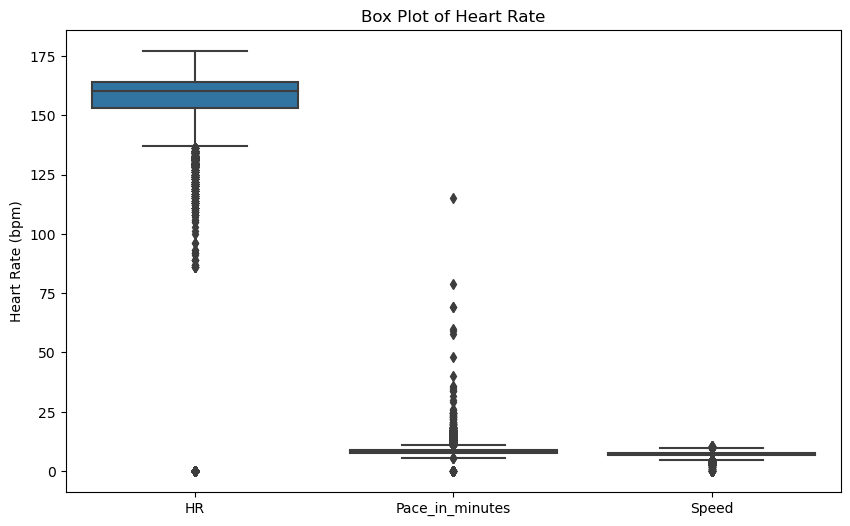

In [48]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(filtered_data)
plt.title('Box Plot of Heart Rate')
plt.ylabel('Heart Rate (bpm)')
plt.show()

### Need to remove outliers of HR

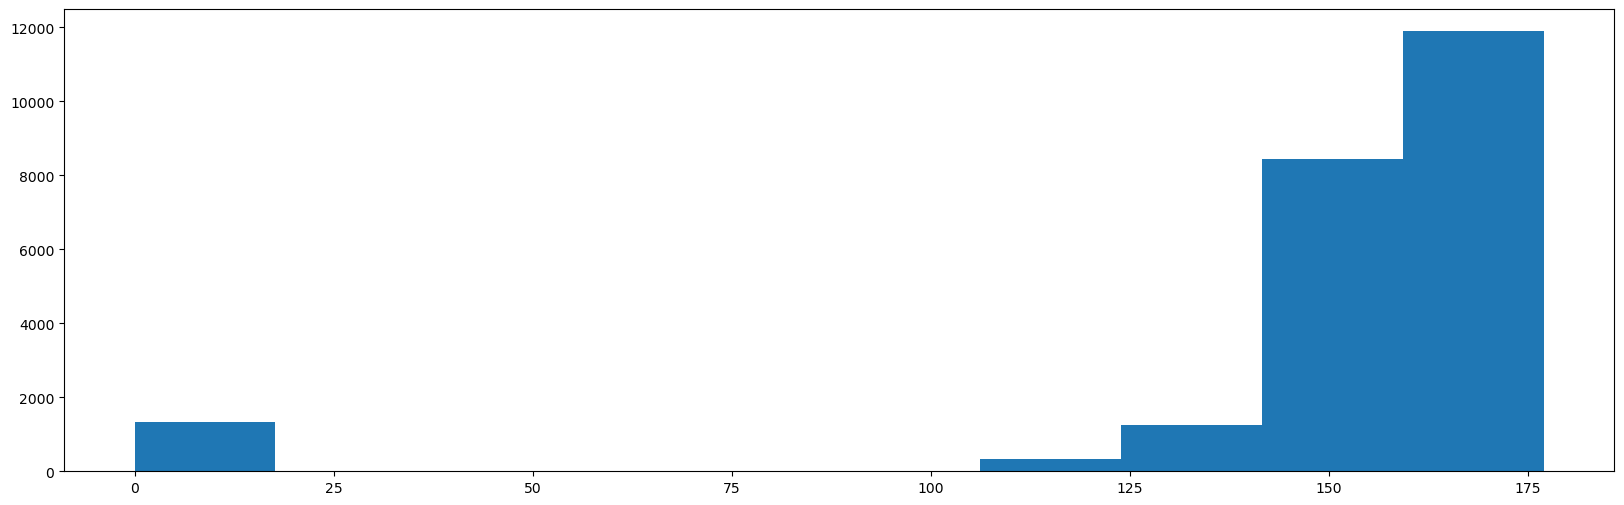

In [49]:
# Visualize Histogram
plt.figure(figsize=(20,6))
plt.hist(heart_rate)
plt.show()

In [50]:
normalized_data = filtered_data[filtered_data['HR'] > 110]

In [51]:
normalized_data

,Real_Time,HR,Pace_in_minutes,Speed
0,2024-02-06 14:43:30,116.0,0.000000,0.0
1,2024-02-06 14:43:31,116.0,18.600000,3.2
2,2024-02-06 14:43:32,116.0,10.216667,5.9
3,2024-02-06 14:43:33,116.0,10.216667,5.9
4,2024-02-06 14:43:34,116.0,7.950000,7.5
...,...,...,...,...
36941,2024-01-29 14:38:34,158.0,8.783333,6.8
36942,2024-01-29 14:38:35,158.0,8.550000,7.0
36943,2024-01-29 14:38:36,158.0,8.400000,7.1
36944,2024-01-29 14:38:37,158.0,8.500000,7.1


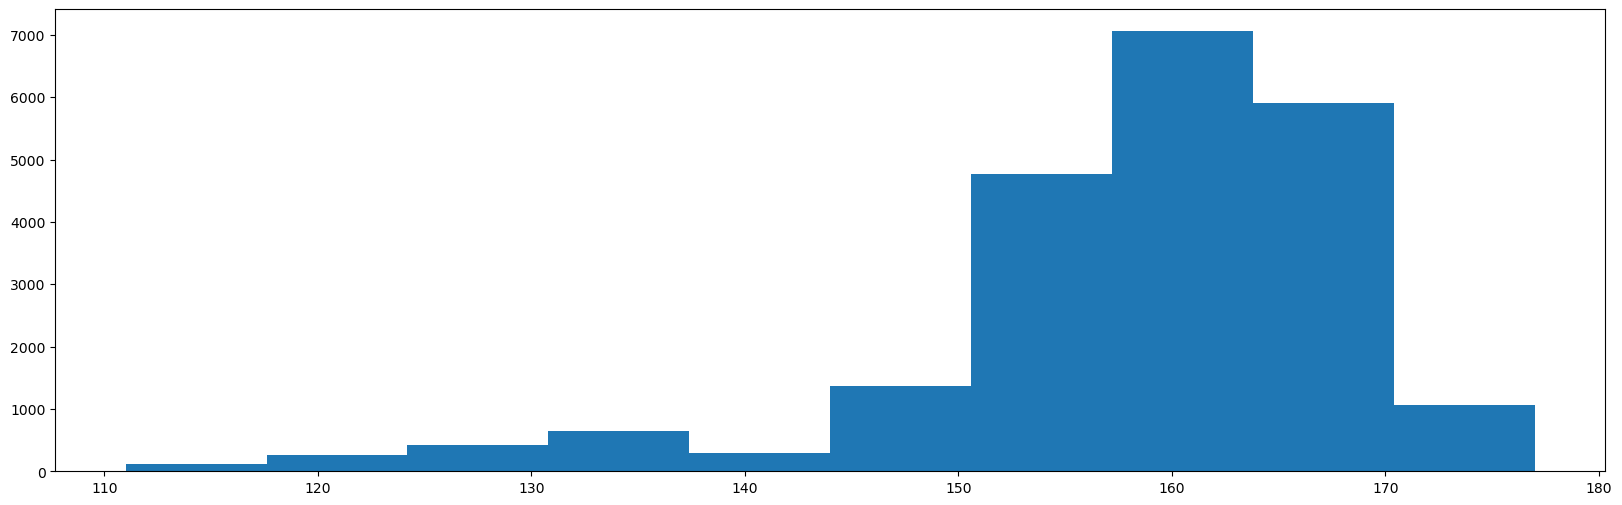

In [52]:
# Visualize Histogram
plt.figure(figsize=(20,6))
plt.hist(normalized_data['HR'])
plt.show()

In [53]:
normalized_data

,Real_Time,HR,Pace_in_minutes,Speed
0,2024-02-06 14:43:30,116.0,0.000000,0.0
1,2024-02-06 14:43:31,116.0,18.600000,3.2
2,2024-02-06 14:43:32,116.0,10.216667,5.9
3,2024-02-06 14:43:33,116.0,10.216667,5.9
4,2024-02-06 14:43:34,116.0,7.950000,7.5
...,...,...,...,...
36941,2024-01-29 14:38:34,158.0,8.783333,6.8
36942,2024-01-29 14:38:35,158.0,8.550000,7.0
36943,2024-01-29 14:38:36,158.0,8.400000,7.1
36944,2024-01-29 14:38:37,158.0,8.500000,7.1


In [58]:
# Find Dates for Unique Dates
unique_runs = normalized_data['Real_Time'].dt.date.unique()
formatted_dates = [date.strftime("%Y-%m-%d") for date in unique_runs]
formatted_dates

['2024-02-06',
 '2024-01-09',
 '2024-01-11',
 '2024-01-23',
 '2024-01-27',
 '2024-01-01',
 '2024-01-16',
 '2024-02-16',
 '2024-02-28',
 '2024-01-18',
 '2024-02-03',
 '2024-02-25',
 '2024-02-13',
 '2024-02-10',
 '2024-01-29']

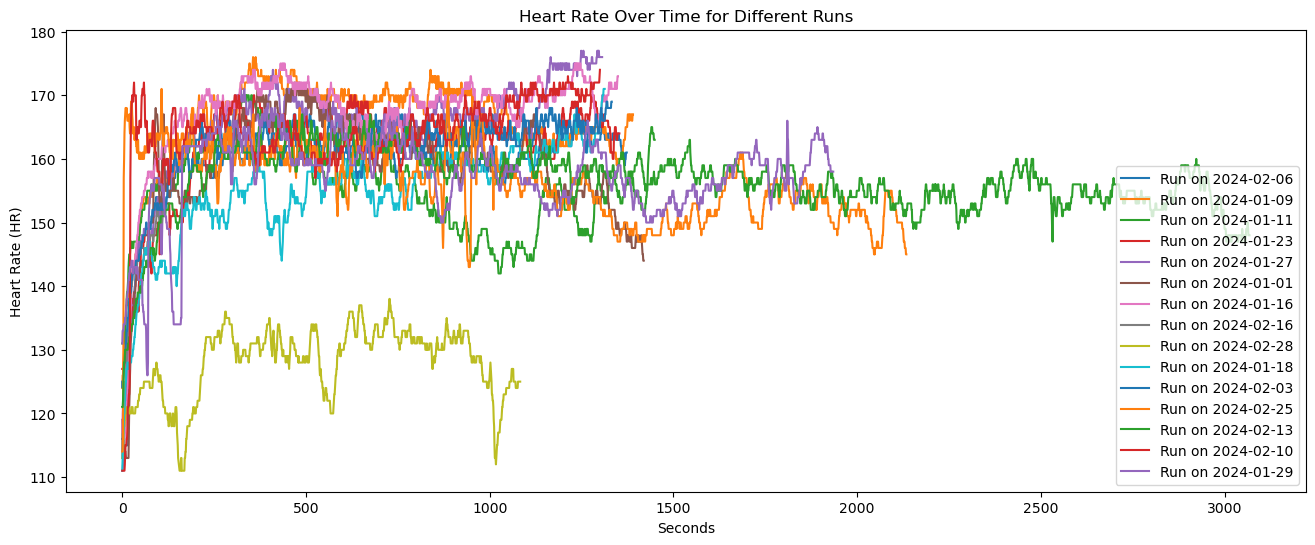

In [69]:
# Iterrate through the unique dates to visualize the parameters of the run
plt.figure(figsize=(16, 6))

# Iterate through the unique dates to visualize the parameters of each run
for date in unique_runs:
    # Filter data for the current date
    data = normalized_data[normalized_data['Real_Time'].dt.date == date].copy()

    if data.empty:
        print(f"No data for {date}")
        continue

    # Sort by 'Real_Time'
    data = data.sort_values(by='Real_Time')

    # Calculate time difference from the first time of the day and extract total seconds
    time_difference = data['Real_Time'] - data['Real_Time'].min()
    data['seconds'] = time_difference.dt.total_seconds().astype(int)

    # Get HR and seconds for plotting
    hr = data['HR']
    seconds = data['seconds']
    
    # Plot HR against seconds with a label for each run's date
    plt.plot(seconds, hr, label=f'Run on {date}')

# Add labels and title
plt.xlabel('Seconds')
plt.ylabel('Heart Rate (HR)')
plt.title('Heart Rate Over Time for Different Runs')

# Add a legend to differentiate runs
plt.legend(loc='best')

# Show the plot
plt.show()